## Import Libraries

In [ ]:
 !pip install keras_nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.2/572.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 71.1 MB/s eta 0:00:00


# Text Classification Using Transformer

In [ ]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd
# Importing the numpy library for numerical operations
import numpy as np
# Importing the TensorFlow library for deep learning
import tensorflow as tf
# Importing the Keras API from TensorFlow for building neural networks
from tensorflow import keras
# Importing train_test_split for splitting the dataset
from sklearn.model_selection import train_test_split
# Importing the keras_nlp library for NLP-related utilities
import keras_nlp

## Load data

In [ ]:
# Reading the CSV file into a pandas DataFrame and storing it in the variable 'train_df'
splits = {'session1': 'data/session1-00000-of-00001-43ba2fc5001022a6.parquet', 'session2': 'data/session2-00000-of-00001-0e3d7ee01a7dec3b.parquet', 'session3': 'data/session3-00000-of-00001-aa7c597f69bf090c.parquet', 'session4': 'data/session4-00000-of-00001-9c53cab42bdaf956.parquet', 'session5': 'data/session5-00000-of-00001-f57c47de5f8fb998.parquet'}
df = pd.read_parquet("hf://datasets/Zahra99/IEMOCAP_Text/" + splits["session1"])
df.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,text,label
0,Next.,0
1,My window is open.,0
2,"Yes, Jones.",2
3,"No, I need your ID to give you a second ID.",0
4,It's really simple if you have a problem with ...,0


## EDA

In [ ]:
df.head()

,text,label
0,Next.,0
1,My window is open.,0
2,"Yes, Jones.",2
3,"No, I need your ID to give you a second ID.",0
4,It's really simple if you have a problem with ...,0


In [ ]:
df["text_length"] = df["text"].apply(lambda item: len(item.split(" ")))

In [ ]:
df["text_length"].describe()

,text_length
count,1085.000000
mean,10.673733
std,9.990147
min,1.000000
25%,4.000000
50%,8.000000
75%,14.000000
max,84.000000


<Axes: ylabel='count'>

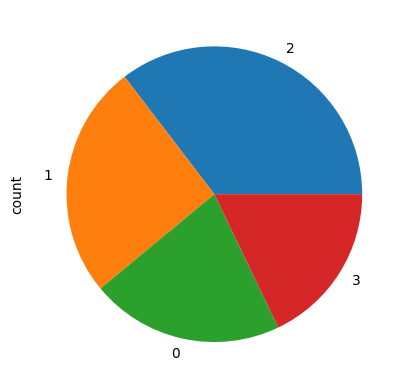

In [ ]:
df.label.value_counts().plot(kind="pie")

This code snippet is used to split the data into training and validation sets.


In [ ]:
texts = df['text'].values
labels = df['label'].values
x_train, x_val, y_train, y_val = train_test_split(texts, labels, test_size=0.2, random_state=42)

This code snippet is used to perform text vectorization. Let's break it down:

- The `TextVectorization` layer from the Keras library is being used. It helps convert text data into numerical representations that can be fed into a neural network model.

In [ ]:
vectorizer = keras.layers.TextVectorization(max_tokens=10000, output_mode='int', output_sequence_length=1024)
vectorizer.adapt(texts)

## Modeling

This code sets up a sequential model for text classification using various layers such as input, vectorizer, embedding, TransformerEncoder, global max pooling, and dense layers. It then compiles the model with the specified loss function, optimizer, and metrics. Finally, it prints a summary of the model architecture.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'global_max_pooling1d' (of type GlobalMaxPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization                   │ (None, 1024)                │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 1024, 128)           │         194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_encoder                  │ (None, 1024, 128)           │          99,584 │
│ (TransformerEncoder)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 302,597 (1.15 MB)

 Trainable params: 302,597 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

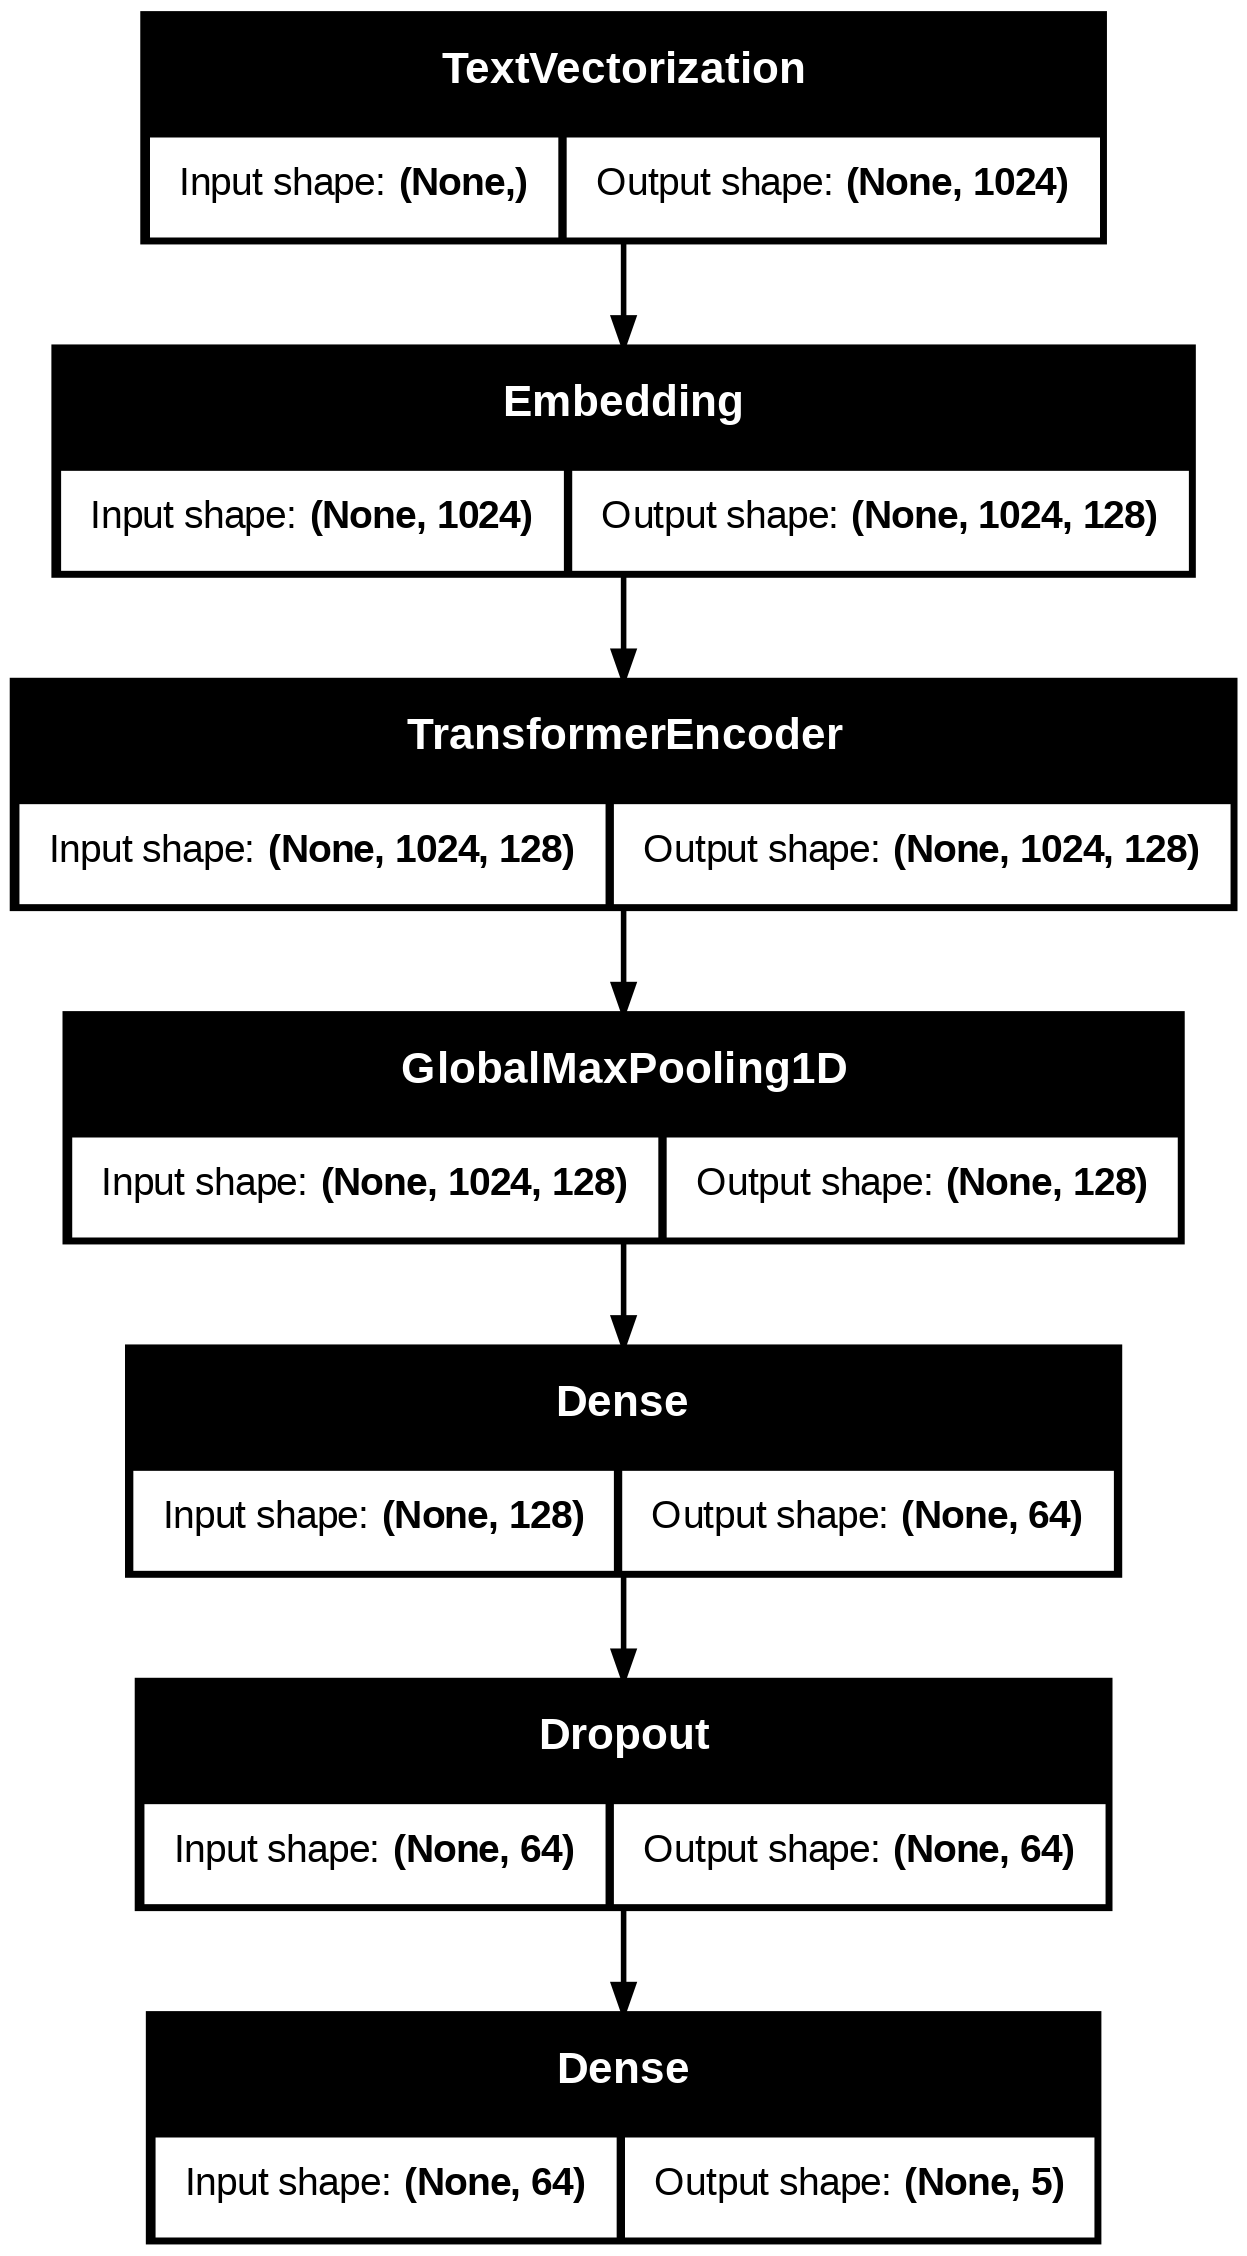

In [ ]:
# Creating a sequential model
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(), dtype=tf.string))
model.add(vectorizer)
# Adding an embedding layer with vocabulary size, embedding dimension 128, and mask_zero set to True
model.add(keras.layers.Embedding(len(vectorizer.get_vocabulary()), 128, mask_zero=True))
# Adding a TransformerEncoder layer with 128 units, 4 attention heads, and 0.1 dropout rate
model.add(
    keras_nlp.layers.TransformerEncoder(
        128,
        4,
        dropout=0.1
    )
)
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
batch_size = 32
epochs = 5
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(
        x_val,
        y_val
    )
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'value' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - accuracy: 0.2479 - loss: 1.9256 - val_accuracy: 0.3917 - val_loss: 1.3349
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.4790 - loss: 1.2244 - val_accuracy: 0.4931 - val_loss: 1.2055
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.6392 - loss: 0.9118 - val_accuracy: 0.4931 - val_loss: 1.1810
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.7636 - loss: 0.7468 - val_accuracy: 0.5530 - val_loss: 1.1501
Epoch 5/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.8214 - loss: 0.5496 - val_accuracy: 0.5530 - val_loss: 1.2170


## Model Evaluation

In [ ]:
loss, acc = model.evaluate(x_val, y_val)
print(f"Validation Loss: {loss: .4f}")
print(f"Validation Accuracy: {acc: .4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5754 - loss: 1.1948
Validation Loss:  1.2170
Validation Accuracy:  0.5530


In [ ]:
# prompt: code for calculating accuracy of x_val and y_val using f1_score, precison, recall, accuracy score and confusion matrix

import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

# Predict classes for validation data
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
f1 = f1_score(y_val, y_pred_classes, average='weighted')
precision = precision_score(y_val, y_pred_classes, average='weighted')
recall = recall_score(y_val, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_val, y_pred_classes)
conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Print results
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
F1 Score: 0.5527
Precision: 0.5556
Recall: 0.5530
Accuracy: 0.5530
Confusion Matrix:
 [[29 10  9  2]
 [ 8 37 11  5]
 [ 8 19 37 10]
 [ 3  4  8 17]]


In [ ]:
model.predict(x_val)

7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step


array([[0.11530914, 0.02791275, 0.06933697, 0.20276763, 0.58467346],
       [0.09542342, 0.00460256, 0.00848314, 0.41165304, 0.47983783],
       [0.12577607, 0.00137969, 0.00402848, 0.5289958 , 0.33982   ],
       ...,
       [0.22387351, 0.00242015, 0.00656416, 0.40226218, 0.36487997],
       [0.20936489, 0.0044859 , 0.0194107 , 0.49291393, 0.2738246 ],
       [0.21886209, 0.00577683, 0.00900411, 0.41      , 0.35635704]],
      dtype=float32)